# Trabalho Final - Análise de Dados com Python

Integrantes:

    1) nome1
    2) nome2
    3) nome3
    4) nome4

### Enunciado
O departamento de crédito da QuantumFinance solicitou a criação de um algoritmo para predizer o valor dos imóveis em determinada região a fim de mensurarem a provisão de crédito para o próximo ano. Assim, baseado no dataset disponível, use Regressão Linear Multivariada para predizer o valor dos imóveis com um RMSE abaixo de 69000. [dataset](https://github.com/ageron/handson-ml2/tree/master/datasets/housing)

In [93]:
import pandas as pd
import numpy as np

## California Housing Dataset - Descrição das Colunas

**1. longitude**  
- **Descrição**: A coordenada longitudinal da localização da habitação.  
- **Detalhes**: Representa a localização geográfica horizontal, geralmente com valores negativos para locais na Califórnia.

**2. latitude**  
- **Descrição**: A coordenada latitudinal da localização da habitação.  
- **Detalhes**: Representa a localização geográfica vertical.

**3. housing_median_age**  
- **Descrição**: Mediana da idade das casas em um determinado bloco.  
- **Detalhes**: Um valor mais baixo pode indicar um bairro mais novo, enquanto um valor mais alto pode indicar um bairro mais antigo.

**4. total_rooms**  
- **Descrição**: Total de cômodos existentes em todas as casas de um determinado bloco.

**5. total_bedrooms**  
- **Descrição**: Total de quartos de dormir existentes em todas as casas de um determinado bloco.

**6. population**  
- **Descrição**: População total de um bloco.

**7. households**  
- **Descrição**: Número total de domicílios em um determinado bloco.  
- **Detalhes**: Refere-se a um grupo de pessoas vivendo juntas em uma casa ou apartamento.

**8. median_income**  
- **Descrição**: Mediana da renda dos residentes de um bloco.  
- **Detalhes**: Medida em dezenas de milhares de dólares.

**9. median_house_value**  
- **Descrição**: Mediana do valor das casas em um bloco.  
- **Detalhes**: Medida em dólares. É o valor que estamos frequentemente tentando prever em modelos de regressão utilizando este dataset.

**10. ocean_proximity**  
- **Descrição**: Categoria que define a proximidade da habitação ao oceano.  
- **Detalhes**: Pode ter várias categorias como 'NEAR BAY', 'INLAND', 'NEAR OCEAN', entre outros.


In [94]:
# leitura dos dados
housing = pd.read_csv('bases/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Analise Geral do dataset

In [95]:
print(housing.info())
housing.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### Tratamento dos dados faltantes

In [96]:
housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(),inplace=True)
housing.isnull().sum()

# housing.dropna(inplace=True)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Check e casting do tipo das colunas

In [97]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [98]:
housing['housing_median_age'] = housing['housing_median_age'].astype(int)
housing['total_rooms'] = housing['total_rooms'].astype(int)
housing['total_bedrooms'] = housing['total_bedrooms'].astype(int)
housing['population'] = housing['population'].astype(int)
housing['households'] = housing['households'].astype(int)

housing.dtypes

longitude             float64
latitude              float64
housing_median_age      int32
total_rooms             int32
total_bedrooms          int32
population              int32
households              int32
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

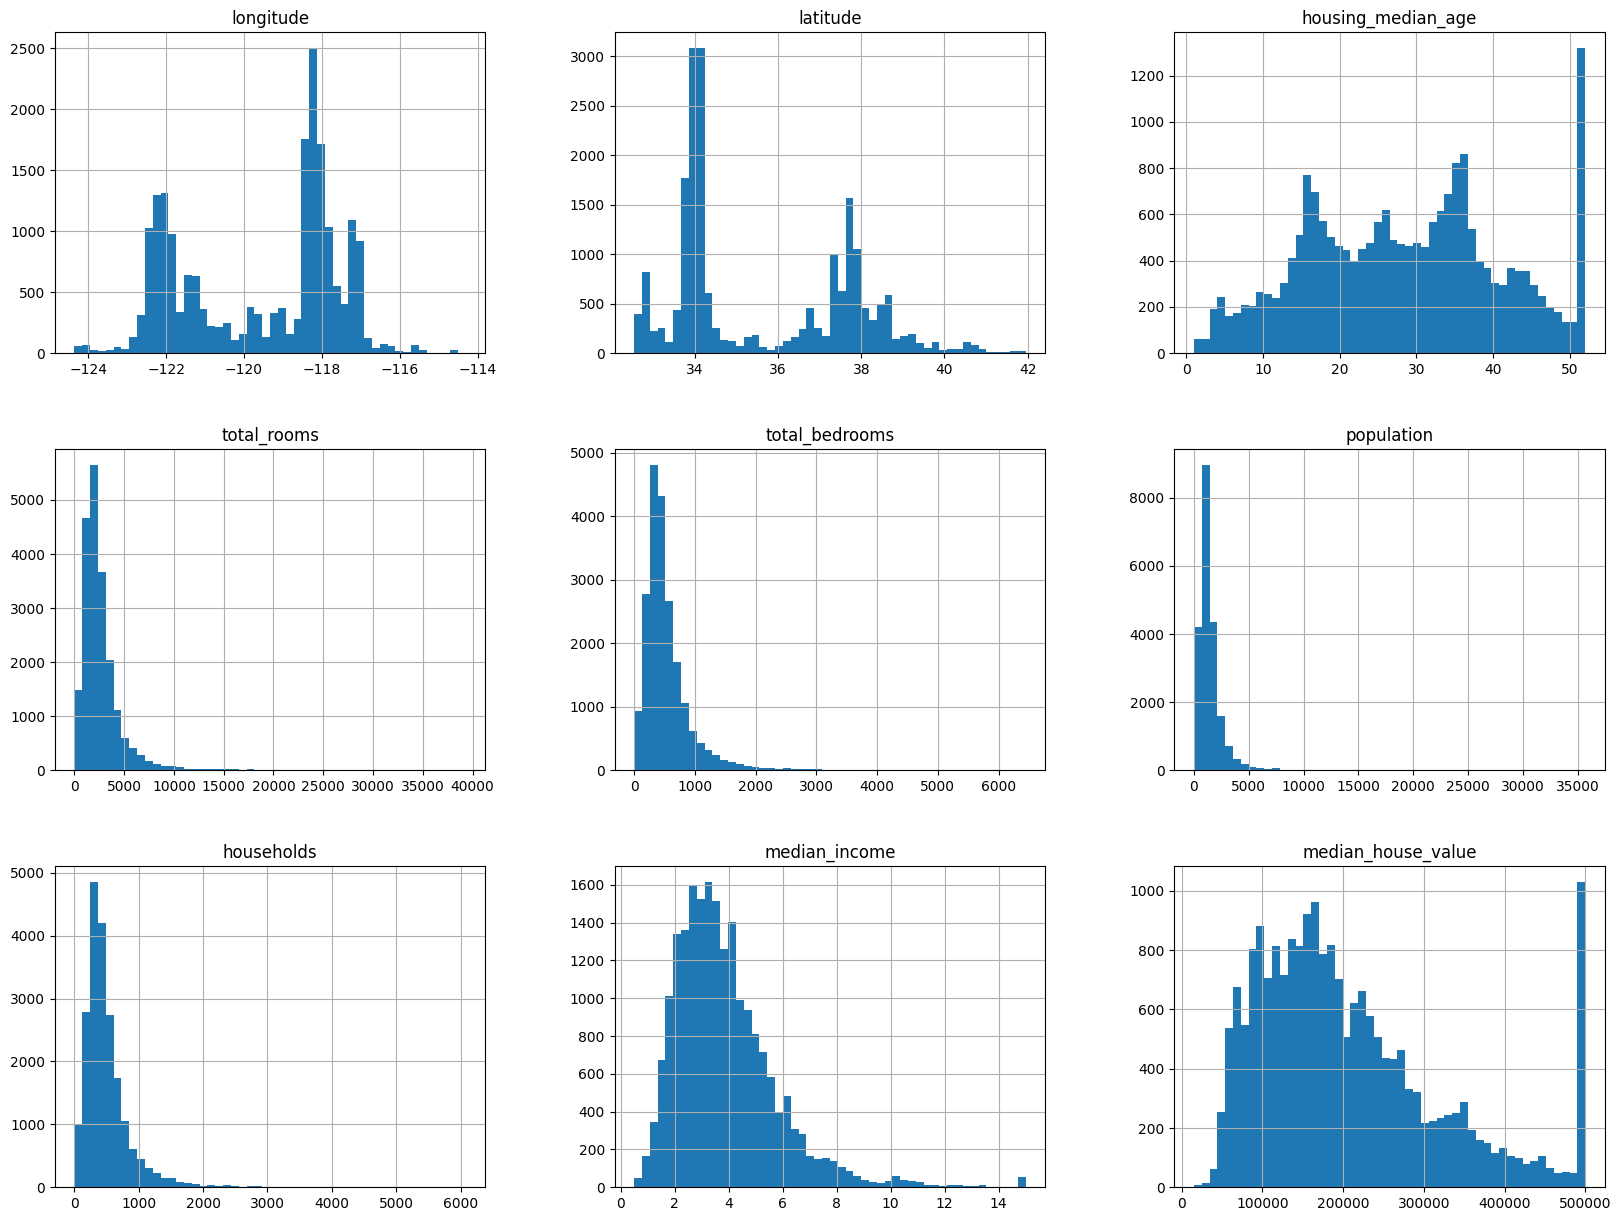

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [100]:
housing_numerical = housing.copy()
housing_numerical.drop(['ocean_proximity'], axis=1, inplace=True)

corr = housing_numerical.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000


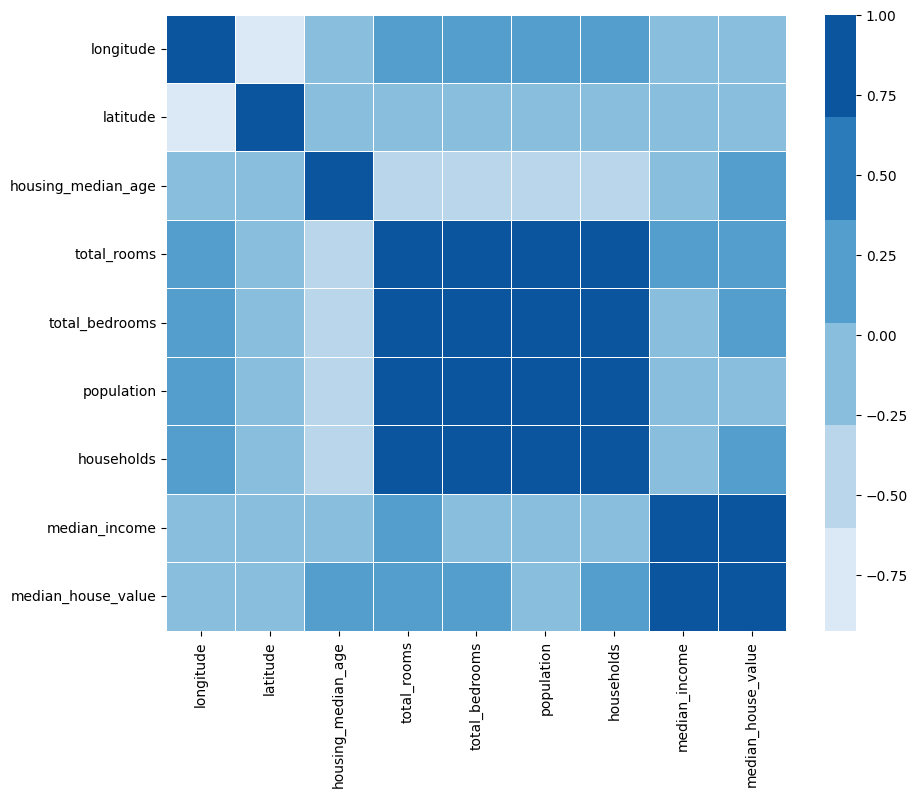

In [101]:
#Vamos ver a correlação graficamente
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap=sns.color_palette("Blues"), linewidths=.5, annot=False);


### Analise da variavel categorica

In [102]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

## Preparação do dataset para o treinamento do modelo

In [103]:
from sklearn.model_selection import train_test_split

X = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [104]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_attribs = list(X.drop("ocean_proximity", axis=1))
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    # ('std_scaler', MinMaxScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
    # ("cat", OrdinalEncoder(), cat_attribs),
])

X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)


## Treinamento do Modelo

In [105]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

# Fazendo previsões
y_pred = lin_reg.predict(X_test_prepared)


In [106]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

# Calcular R²
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")


RMSE: 68800.64878395082
MAE: 50078.098841565436
R²: 0.6393611711434394


In [107]:
comparison_df = pd.DataFrame({
    "Valores Reais": y_test,
    "Valores Preditos": y_pred
})

print(comparison_df.head())

       Valores Reais  Valores Preditos
20046        47700.0      54560.136586
3024         45800.0     122939.978193
15663       500001.0     252588.015479
20484       218600.0     267738.637526
9814        278000.0     262688.273943


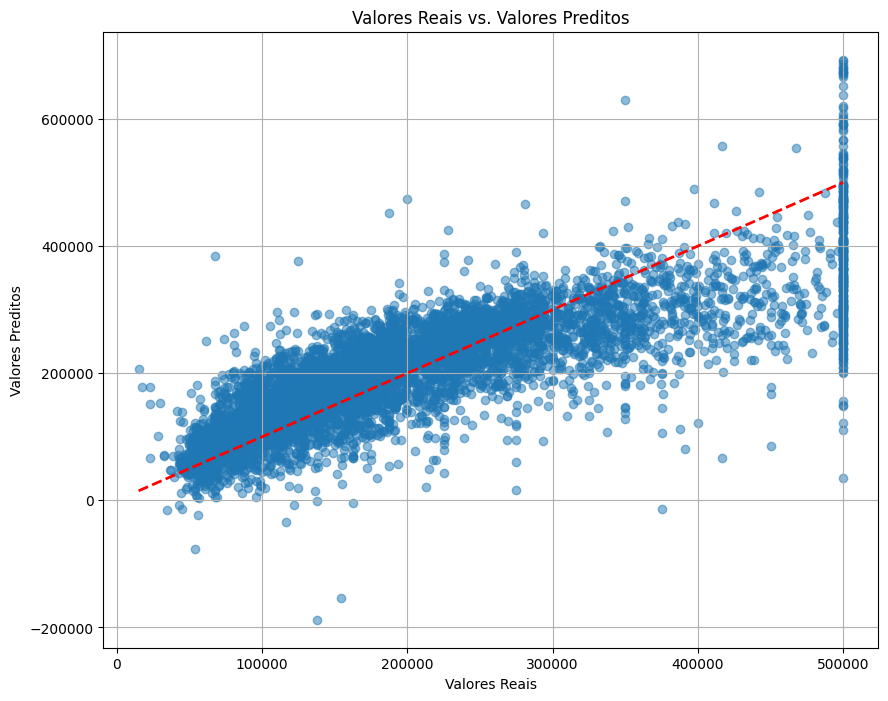

In [108]:
import matplotlib.pyplot as plt

# Plotando os valores reais vs. preditos
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs. Valores Preditos')
plt.grid(True)
plt.show()


In [109]:
list_rmse = []
list_mae = []
list_r2 = []


for i in range(0,100):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    num_attribs = list(X.drop("ocean_proximity", axis=1))
    cat_attribs = ["ocean_proximity"]

    num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
        # ('std_scaler', MinMaxScaler()),
    ])

    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        # ("cat", OrdinalEncoder(), cat_attribs),
    ])

    X_train_prepared = full_pipeline.fit_transform(X_train)
    X_test_prepared = full_pipeline.transform(X_test)

    from sklearn.linear_model import LinearRegression

    lin_reg = LinearRegression()
    lin_reg.fit(X_train_prepared, y_train)

    # Fazendo previsões
    y_pred = lin_reg.predict(X_test_prepared)

    # Calcular RMSE
    list_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    # Calcular MAE
    list_mae.append(mean_absolute_error(y_test, y_pred))

    # Calcular R²
    list_r2.append(r2_score(y_test, y_pred))


In [114]:
np.mean(list_rmse)

68924.70414288706

In [111]:
list_rmse

[69149.75500344436,
 69107.88959525037,
 69529.93914470031,
 67352.62482395515,
 69180.7853504518,
 69896.29297089398,
 68972.2001148325,
 68420.3688382104,
 68090.41831402319,
 69010.44656152354,
 69119.8631628205,
 69521.96193589432,
 69781.19437458926,
 69062.90475750202,
 68399.55388669216,
 69422.61715139996,
 68882.93185032855,
 68665.32980571636,
 67821.1980998891,
 69063.8328784987,
 69814.2582676757,
 69898.81996654063,
 66383.30464782311,
 68715.36518056066,
 68150.80482873294,
 68541.31358689988,
 68390.55731831743,
 68502.34150155316,
 67348.02465093632,
 67984.42994908118,
 71869.61009965348,
 68880.37879575737,
 70063.08701202285,
 68644.47692517983,
 68196.1209669084,
 69699.6658208994,
 69141.89270801569,
 67539.35556648986,
 66936.34716586529,
 68936.06915000854,
 69750.4465846304,
 69082.66281672087,
 68800.64878395082,
 68492.71708495506,
 67905.71862898662,
 69748.6408532865,
 68546.94109442436,
 70317.2248264443,
 69224.95478395854,
 68333.3694602066,
 68973.165730